# Coding Exercise #4 *Hermite-Gaussian Beams* 

In this exercise, you will visualise Hermite_Gaussian (HG) beams and analyse their dependencies on various parameters.

HG beams are usually denoted $TEM_{m,n}$ where $TEM$ stands for Transverse Electromagnetic and $m,n$ are integers specifying the orders of the mode in the $x$ and $y$ directions transverse to the beam propagation direction, $z$.

Note that sometimes the commas between $m$ and $n$ are omitted, i.e. $TEM_{mn}$.

The **electric field** of the $TEM_{m,n}$ mode is given by the following somewhat intimidating formula:


##  $E_{mn}(x,y,z)=H_m\left(\frac{\sqrt 2 x}{w(z)}\right)H_n\left(\frac{\sqrt 2 y}{w(z)}\right)\exp\left(i(m+n)\arctan\left(\frac{z}{z_R}\right)\right)E_{00}$

where $H_n$(X) is the $n^{th}$ order Hermite polynomial, and $TEM_{0,0}$ is the lowest-order mode (often referred to as a *Gaussian Beam*), with **electric field** given by:

### $E_{00}(r=\sqrt{x^2+y^2}, z)=E_0 * \left(\frac{w_0}{w(z)}\right)\exp\left(\frac{-r^2}{w^2(z)}\right)\exp \left(-i k z - \frac{i k r^2}{2 R(z)} + i\arctan \left(\frac{z}{z_R}\right)\right)$

where $k=2\pi/\lambda$ is wavenumber and

$w(z) = w_0\sqrt{1+\left(\frac{z}{z_r}\right)^2}$ is the beam radius

$R(z) = z + \frac{z_R^2}{z}$ is the wavefront radius of curvature

$z_R = \frac{\pi w_0^2}{\lambda}$ is the *Rayleigh Range* which is a measure of the depth of focus

and 

$w_0 = w(0)$ is the *beam waist* which is the minimum beam radius, also known as the *spot radius*.

Though these formulae are a bit of a handful, they are relatively easy to model. Modelling is an excellent way of getting a physical feel for these functions.

# Coding Task

A HeNe laser ($\lambda=633\,$nm) with a TEM$_{00}$ mode has its beam waist ($w_0=0.5\,$mm) located at its output coupler.

### 4.1 Beams radius and area

a) Plot the beam waist radius as a function of distance $z$ away from the output coupler in the range 0-10 m, where $z=0$ coresponds to the position of the output coupler.

b) Show that the beam radius asymptotically approaches $w_0 z/z_R$ as $z\rightarrow\infty$.

c) Convince yourself that the beam area has doubled after a distance $z_R$.

d) The laser is pointed to the Moon. Estimate the beam size on the Moon's surface. What assumptions did you make?

### 4.2 Wavefront radius of curvature

a) Plot the wavefront radius of curvature over the same range as 4.1a).

b) Show that far from the laser, the wavefront looks like a section of a wavefront from a point-source located at the waist.

**Hint**: Think about what kind of waves are emitted by a point source.

c) Convince yourself that the wavefront is most curved at $z=z_R$.

b) Convince yourself that the wavefront is plane (flat) at the beam waist.

### 4.3 Intensity

For these questions, you will need to use the formula given above for the electric field $TEM_{mn}$. 

Recall that the intensity $I\propto|E|^2$. Here you can assume the constant of proportionality is 1, i.e. $I =|E|^2$ or in code `I=np.abs(E)**2`, so $I$ will be in arbitrary units.

a) Plot the beam intensity as a function of $z$ on the beam axis, i.e. for $r=0$. You can set $E_0=1$ so the intensity will be in arbitrary units.

b) Plot the normalised beam intensity as a function of $r$ at the beam waist and at $z=2\,$m. Convince yourself that the width of the intensity distributions at the $1/e^2$ height is $w(z)$.

c) Plot a heatmap of $I\left(r(x,y)\right)$ at $z=2\,$m, where $r(x,y) = \sqrt{x^2 + y^2}$. This is the 2D beam profile and is what a camera would "see" if positioned at this z position.

**Spoiler**: The following shows one way to to create a 2D heatmap for the (randomly chosen) function $f(x,y) = \sin (4 x)\cos(4 y) \exp(-x^2-y^2)$ for $x=$ -3 to 3, and $y=$ -3 to 3. There are other ways, so feel free to experiment!

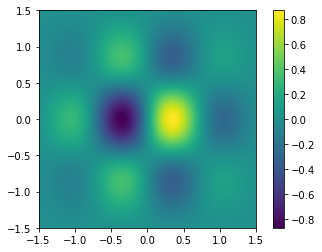

In [27]:
xmin, xmax = ymin, ymax = -1.5, 1.5 

# create a mesh of points
x, y = np.meshgrid(np.linspace(xmin, xmax, NUM_PTS),  np.linspace(ymin, ymax, NUM_PTS))

# calc function on this mesh
f = np.sin(4*x)*np.cos(3*y) * np.exp(-x ** 2 - y ** 2)

# create 2D heatmap, note:pcolormesh can handle unevenly spaced meshes and seems to be much faster than pcolormesh
c = plt.pcolormesh(x, y, f)

# set the axes ranges, otherwise the array indices will be used
plt.axis([xmin, xmax, ymin, ymax])

# add a colour bar
plt.colorbar(c)

# set the aspect ratio of the plot to 1 (this will be useful later for plotting round beams)
axes=plt.gca()
axes.set_aspect(1)

plt.show()

### 4.4 Higher-Order Modes

Due to a misalignment, the HeNe mode changes to $TEM_{21}$.

a) Repeat 4.3c).  Note: You can import the hermite polynomials from scipy as follows:

`from scipy.special import eval_hermite`

b) Repeat a) some other $m, n$ values. How do the $m, n$ value relate to the beam structure horizontally and vertically?

### 4.5 Extension: Intensity Contours

Just like contour lines on a geographical map show lines of constant land height, intensity contours show lines of constant intensity. These are useful in many applications of lasers, where a beam interacts with a sample, and it's important to know which regions of the sample experience what intensity.

a) Conisder a  2D slice $(x=0, y, z)$ through the $TEM_{00}$ HeNe beam, i.e a slice along the beam axis. Make a contour plot of the intensity over $(y,z)$ for $y$ in the range $-5 w_0$ to $5 w0$, and $z$ in the range $-10 z_R$ to $10 z_R$. Play around with the values for the contour levels to get a clear plot of the behaviour.

**Hint**: the inner contours should look elliptical, the outer contours like a figure 8 on its side (but not so pinched in the middle).

**Spoiler**: The following shows one way to to create a 2D contour map for the function $f(x,y) = \sin (4 x)\cos(4 y) \exp(-x^2-y^2)$ for $x=$ -3 to 3, and $y=$ -3 to 3.

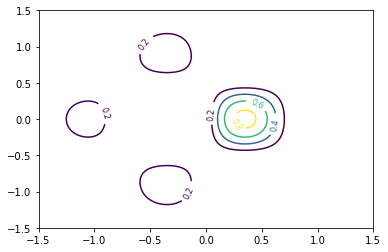

In [33]:
xmin, xmax = ymin, ymax = -1.5, 1.5 

# create a mesh of points
y, x = np.meshgrid(np.linspace(xmin, xmax, NUM_PTS),  np.linspace(ymin, ymax, NUM_PTS))

# calc function on this mesh
f = np.sin(4*x)*np.cos(3*y) * np.exp(-x ** 2 - y ** 2)

# the contours we want, e.g. contour f=0.2 
contour_levels = [0.2, 0.4, 0.6, 0.8]
cp = plt.contour(x, y, f, contour_levels)

# label the contours
plt.clabel(cp, fontsize=8)

plt.show()

b) Estimate the volume bounded by the 50% intensity i.e. the volume within which the beam intensity is greater than or equal to half its maximum value.

You can use the following handy function which returns the points corresponding to a given contour. Best to remove the contour labels before calling this function, else you'll get a gap in the contour line where the label was.

In [1]:
def get_pts_from_ith_contour(cp, i):
    """ returns x, y points from contour cp"""
    p = cp.collections[i].get_paths()[0]
    v = p.vertices
    return v[:,0], v[:,1]